# Introducción a los árboles de decisión

## Tu primer árbol de decisión con scikit-learn

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Pasajeros del Titanic

In [2]:
df = pd.read_csv('../data/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Análisis de datos para tu primer árbol de decisión

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [6]:
df.describe(include='O')

,Name,Sex
count,887,887
unique,887,2
top,Mr. Owen Harris Braund,male
freq,1,573


In [7]:
# Eliminando las columnas que no interesan
df.drop(['Name', 'Fare'], axis=1, inplace=True)

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard'],
      dtype='object')

In [9]:
# Renombrando las columnas
df.columns = ['survived', 'pclass', 'sex', 'age', 'sib_spo', 'par_chi']
df.head()

,survived,pclass,sex,age,sib_spo,par_chi
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [10]:
# Shape del objeto
df.shape

(887, 6)

In [11]:
# Tipos de datos
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sib_spo       int64
par_chi       int64
dtype: object

In [12]:
# Cambiando los tipos de datos
df_1 = pd.get_dummies(df, columns=['sex'], drop_first=True)
df_1.rename(columns= {'sex_male':'sex'}, inplace=True)
df_1.dtypes

survived      int64
pclass        int64
age         float64
sib_spo       int64
par_chi       int64
sex           uint8
dtype: object

In [13]:
df_1.columns

Index(['survived', 'pclass', 'age', 'sib_spo', 'par_chi', 'sex'], dtype='object')

In [14]:
df_1 = df_1[['pclass','sex', 'age', 'sib_spo', 'par_chi', 'survived']]
df_1.tail()

,pclass,sex,age,sib_spo,par_chi,survived
882,2,1,27.0,0,0,0
883,1,0,19.0,0,0,1
884,3,0,7.0,1,2,0
885,1,1,26.0,0,0,1
886,3,1,32.0,0,0,0


## Entrenamiento y evaluación de árbol de decisión con scikit-learn

In [15]:
# Separación de X y Y
X = df_1.drop('survived', axis=1)
y = df_1['survived']

In [16]:
# 30% para test y 70% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Modelo de árbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

In [18]:
# Entrenamiento del modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
# Calculando las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [20]:
# Calculando las metricas
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [21]:
print(f'El accuracy en train es: {train_accuracy}')
print(f'El accuracy en test es: {test_accuracy}')

El accuracy en train es: 0.8064516129032258
El accuracy en test es: 0.7378277153558053


/var/folders/xp/t6sq60kn6xb52fxndvyg162h0000gn/T/ipykernel_7882/590898078.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Column', data=importance_df, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)


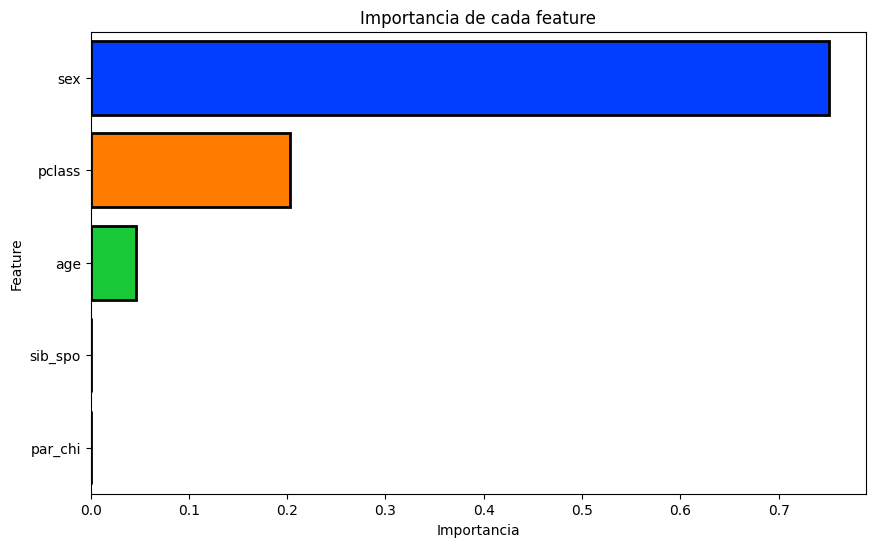

In [22]:
# Verificando el feature importance
importances = tree.feature_importances_
columns = X.columns

# Crear un DataFrame con los datos
importance_df = pd.DataFrame({'Column': columns, 'Importance': importances})

# Ordenar por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Column', data=importance_df, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)

# Título y etiquetas
plt.title('Importancia de cada feature')
plt.xlabel('Importancia')
plt.ylabel('Feature')

# Mostrar el gráfico
plt.show()

* Para la clasificación del modelo en base a la variable target `survived`, los features más importantes son: `sex`, `pclass` y `age`.
* Se observa una performance parecida en la métrica de `accuracy` para los datos de train y test, lo cual es positivo para el modelo.